In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [65]:
vars_df=pd.read_csv('Output/clean_data.csv', low_memory=False)

In [66]:
# Removing rows having numdays > 3651 which seems may be wrong entry in the raw data file.
vars_clean_df=vars_df.loc[vars_df.NUMDAYS<15]
vars_clean_df

,Unnamed: 0,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,HOSPDAYS,...,DISABLE,RECOVD,NUMDAYS,FORM_VERS,ALLERGIES,REPORT_DATE,VAX_TYPE,VAX_MANU,VAX_DOSE_SERIES,HOSP_VISIT
1,1,413803,01/01/2011,TN,67,F,NaN,NaN,NaN,NaN,...,NaN,U,0.0,1,NaN,01/01/2011,FLU3,CSL LIMITED,UNK,NaN
2,2,413804,01/01/2011,MN,62,F,NaN,NaN,NaN,NaN,...,NaN,Y,0.0,1,NaN,01/01/2011,PPV,UNKNOWN MANUFACTURER,1,NaN
4,4,413830,01/01/2011,TN,76,M,NaN,NaN,NaN,NaN,...,NaN,N,9.0,1,NaN,12/28/2010,FLU3,NOVARTIS VACCINES AND DIAGNOSTICS,UNK,Y
5,5,413833,01/01/2011,GA,52,F,NaN,NaN,NaN,NaN,...,NaN,U,1.0,1,NaN,01/01/2011,FLU3,NOVARTIS VACCINES AND DIAGNOSTICS,UNK,NaN
6,6,413809,01/02/2011,AZ,31,F,NaN,NaN,NaN,NaN,...,NaN,Y,0.0,1,NaN,01/02/2011,HEP,GLAXOSMITHKLINE BIOLOGICALS,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603023,603023,1442853,07/02/2021,TX,30,M,NaN,NaN,NaN,NaN,...,NaN,N,2.0,2,NaN,07/02/2021,COVID19,PFIZER\BIONTECH,1,Y
603024,603024,1442854,07/02/2021,FL,17,F,NaN,NaN,NaN,NaN,...,NaN,Y,0.0,2,NaN,07/02/2021,COVID19,PFIZER\BIONTECH,2,NaN
603026,603026,1442856,07/02/2021,CA,37,F,NaN,NaN,NaN,NaN,...,NaN,Y,0.0,2,NaN,07/02/2021,COVID19,PFIZER\BIONTECH,1,NaN
603027,603027,1442857,07/02/2021,DE,69,F,NaN,NaN,NaN,NaN,...,NaN,N,4.0,2,None known,07/02/2021,COVID19,PFIZER\BIONTECH,2,YY


In [67]:
# bins created for getting a range
bins = [10, 20,40,60,80,100,120]

# label for the bins
age_group = ['10-20', '20-40', '40-60', '60-80', '80-100', '100+']

# A column Age Ranges added and the dataframe cuts based on the label
vars_clean_df['Age Ranges']=pd.cut(vars_clean_df.AGE_YRS, bins, labels=age_group)

# Dataframe sorted based Age and grouped by Age Ranges and Numdays.
age_vars_died_df=vars_clean_df.sort_values('AGE_YRS').groupby(['Age Ranges','VAX_TYPE', 'NUMDAYS'])['DIED'].count()
age_vars=age_vars_died_df.reset_index()

numdays_10_20=age_vars.loc[(age_vars['VAX_TYPE'] =='COVID19') & (age_vars['Age Ranges']=='10-20') & (age_vars.DIED != 0)]
numdays_10_20

<ipython-input-67-3045f8fe7534>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vars_clean_df['Age Ranges']=pd.cut(vars_clean_df.AGE_YRS, bins, labels=age_group)


,Age Ranges,VAX_TYPE,NUMDAYS,DIED
76,10-20,COVID19,1.0,6
78,10-20,COVID19,3.0,2
79,10-20,COVID19,4.0,3
81,10-20,COVID19,6.0,1
82,10-20,COVID19,7.0,1
83,10-20,COVID19,8.0,3
84,10-20,COVID19,9.0,1


In [68]:
numdays_20_40=age_vars.loc[(age_vars['VAX_TYPE'] =='COVID19') & (age_vars['Age Ranges']=='20-40') & (age_vars.DIED != 0)]
numdays_20_40

,Age Ranges,VAX_TYPE,NUMDAYS,DIED
1320,20-40,COVID19,0.0,32
1321,20-40,COVID19,1.0,40
1322,20-40,COVID19,2.0,12
1323,20-40,COVID19,3.0,11
1324,20-40,COVID19,4.0,5
1325,20-40,COVID19,5.0,9
1326,20-40,COVID19,6.0,2
1327,20-40,COVID19,7.0,6
1328,20-40,COVID19,8.0,7
1329,20-40,COVID19,9.0,3


In [69]:
numdays_40_60=age_vars.loc[(age_vars['VAX_TYPE'] =='COVID19') & (age_vars['Age Ranges']=='40-60') & (age_vars.DIED != 0)]
numdays_40_60

,Age Ranges,VAX_TYPE,NUMDAYS,DIED
2565,40-60,COVID19,0.0,93
2566,40-60,COVID19,1.0,127
2567,40-60,COVID19,2.0,55
2568,40-60,COVID19,3.0,31
2569,40-60,COVID19,4.0,26
2570,40-60,COVID19,5.0,25
2571,40-60,COVID19,6.0,18
2572,40-60,COVID19,7.0,24
2573,40-60,COVID19,8.0,10
2574,40-60,COVID19,9.0,10


In [70]:
numdays_60_80=age_vars.loc[(age_vars['VAX_TYPE'] =='COVID19') & (age_vars['Age Ranges']=='60-80') & (age_vars.DIED != 0)]
numdays_60_80

,Age Ranges,VAX_TYPE,NUMDAYS,DIED
3810,60-80,COVID19,0.0,287
3811,60-80,COVID19,1.0,327
3812,60-80,COVID19,2.0,166
3813,60-80,COVID19,3.0,114
3814,60-80,COVID19,4.0,106
3815,60-80,COVID19,5.0,66
3816,60-80,COVID19,6.0,52
3817,60-80,COVID19,7.0,67
3818,60-80,COVID19,8.0,35
3819,60-80,COVID19,9.0,47


In [71]:
numdays_80_100=age_vars.loc[(age_vars['VAX_TYPE'] =='COVID19') & (age_vars['Age Ranges']=='80-100') & (age_vars.DIED != 0)]
numdays_80_100

,Age Ranges,VAX_TYPE,NUMDAYS,DIED
5055,80-100,COVID19,0.0,215
5056,80-100,COVID19,1.0,276
5057,80-100,COVID19,2.0,118
5058,80-100,COVID19,3.0,75
5059,80-100,COVID19,4.0,59
5060,80-100,COVID19,5.0,57
5061,80-100,COVID19,6.0,37
5062,80-100,COVID19,7.0,52
5063,80-100,COVID19,8.0,36
5064,80-100,COVID19,9.0,36


In [72]:
numdays_100_plus=age_vars.loc[(age_vars['VAX_TYPE'] =='COVID19') & (age_vars['Age Ranges']=='100+') & (age_vars.DIED != 0)]
numdays_100_plus

,Age Ranges,VAX_TYPE,NUMDAYS,DIED
6300,100+,COVID19,0.0,4
6301,100+,COVID19,1.0,2
6302,100+,COVID19,2.0,4
6303,100+,COVID19,3.0,1
6304,100+,COVID19,4.0,2
6306,100+,COVID19,6.0,3
6307,100+,COVID19,7.0,1
6309,100+,COVID19,9.0,1
6310,100+,COVID19,10.0,1


<BarContainer object of 9 artists>

<Figure size 216x72 with 0 Axes>

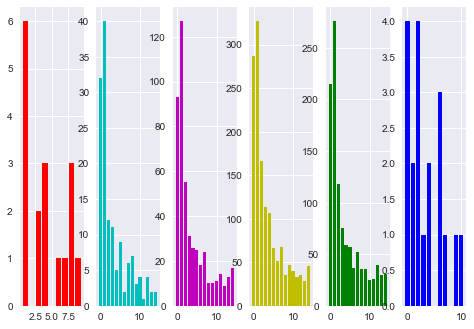

In [116]:
plt.figure(figsize=(3,1))
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1,6)
ax1.bar(numdays_10_20.NUMDAYS,numdays_10_20.DIED, color="r")
ax2.bar(numdays_20_40.NUMDAYS,numdays_20_40.DIED, color='c')
ax3.bar(numdays_40_60.NUMDAYS,numdays_40_60.DIED, color='m')
ax4.bar(numdays_60_80.NUMDAYS,numdays_60_80.DIED, color='y')
ax5.bar(numdays_80_100.NUMDAYS,numdays_80_100.DIED, color='g')
ax6.bar(numdays_100_plus.NUMDAYS,numdays_100_plus.DIED, color='b')

In [73]:
plt.style.use('seaborn')
font1 = {'family':'serif','color':'darkgreen','size':15}
font2 = {'family':'serif','color':'darkred','size':15}
width=0.3


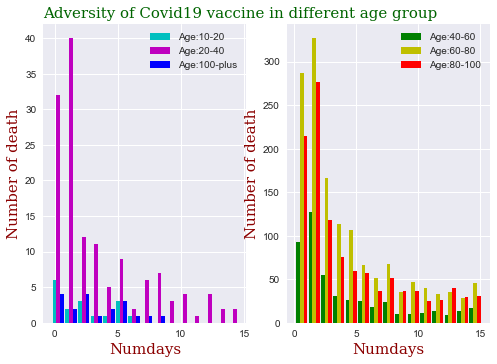

In [74]:
# Bar plotting of age ranges vs died and numdays
plt.subplot(1,2,1)
plt.bar(np.arange(len(numdays_10_20.NUMDAYS)),numdays_10_20.DIED,width, color='c', label='Age:10-20')
plt.bar(np.arange(len(numdays_20_40.NUMDAYS))+width,numdays_20_40.DIED, width, color='m', label='Age:20-40')
plt.bar(np.arange(len(numdays_100_plus.NUMDAYS))+width+width,numdays_100_plus.DIED, width, color='b', label='Age:100-plus')

plt.title("Adversity of Covid19 vaccine in different age group",loc='left', fontdict=font1)
plt.xlabel("Numdays",fontdict=font2)
plt.ylabel('Number of death',fontdict=font2)
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.bar(np.arange(len(numdays_40_60.NUMDAYS))+width,numdays_40_60.DIED, width, color='g', label='Age:40-60')
plt.bar(np.arange(len(numdays_60_80.NUMDAYS))+width+width,numdays_60_80.DIED, width, color='y', label='Age:60-80')
plt.bar(np.arange(len(numdays_80_100.NUMDAYS))+width+width+width,numdays_80_100.DIED, width, color='r', label='Age:80-100')

plt.xlabel("Numdays",fontdict=font2)
plt.ylabel('Number of death',fontdict=font2)
plt.legend(loc='best')
plt.show()

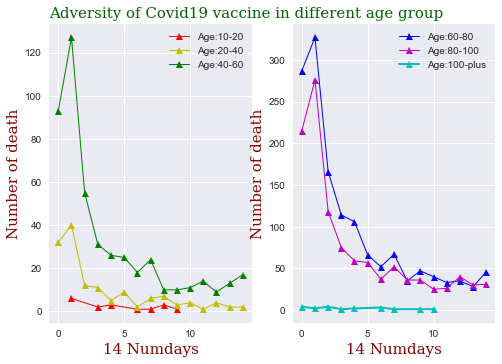

In [75]:


plt.xlabel("Numdays",fontdict=font2)
plt.ylabel('Number of death',fontdict=font2)
plt.subplot(1,2,1)

plt.plot(numdays_10_20.NUMDAYS,numdays_10_20.DIED, marker='^', color='r', linewidth=1, label='Age:10-20')
plt.plot(numdays_20_40.NUMDAYS,numdays_20_40.DIED, marker='^', color='y', linewidth=1, label='Age:20-40')
plt.plot(numdays_40_60.NUMDAYS,numdays_40_60.DIED, marker='^', color='g', linewidth=1, label='Age:40-60')

plt.title("Adversity of Covid19 vaccine in different age group",loc='left', fontdict=font1)
plt.xlabel("14 Numdays",fontdict=font2)
plt.ylabel('Number of death',fontdict=font2)
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(numdays_60_80.NUMDAYS,numdays_60_80.DIED, marker='^', color='b', linewidth=1, label='Age:60-80')
plt.plot(numdays_80_100.NUMDAYS,numdays_80_100.DIED, marker='^', color='m', linewidth=1, label='Age:80-100')
plt.plot(numdays_100_plus.NUMDAYS,numdays_100_plus.DIED, marker='^', color='c', linewidth=2, label='Age:100-plus' )

plt.xlabel("14 Numdays",fontdict=font2)
plt.ylabel('Number of death',fontdict=font2)
plt.legend(loc='best')
plt.show()

In [76]:
# from IPython.display import display, HTML
# Extracting daraframe only having COVID19
pie_covid_df=vars_clean_df.loc[vars_clean_df.VAX_TYPE=='COVID19']

# Sorting values by Age group 
pie_vars_df=pie_covid_df.sort_values(by='AGE_YRS').groupby(['Age Ranges'])['DIED'].count()
df1=pie_vars_df.reset_index()

# Extracting dataframe excluding COVID19
pie_noncovid_df=vars_clean_df.loc[vars_clean_df.VAX_TYPE != 'COVID19']

# Sorting values by Age group 
pie_died_df=pie_noncovid_df.sort_values(by='AGE_YRS').groupby(['Age Ranges'])['DIED'].count()
df2=pie_died_df.reset_index()
print("Covid19 Vaccination")
display(df1)
print('Non-Covid19 Vaccination')
display(df2)


Covid19 Vaccination


,Age Ranges,DIED
0,10-20,17
1,20-40,140
2,40-60,483
3,60-80,1449
4,80-100,1113
5,100+,19


Non-Covid19 Vaccination


,Age Ranges,DIED
0,10-20,38
1,20-40,20
2,40-60,63
3,60-80,172
4,80-100,107
5,100+,0


Text(0.5, 1.0, 'Non-Covid19 (death%)')

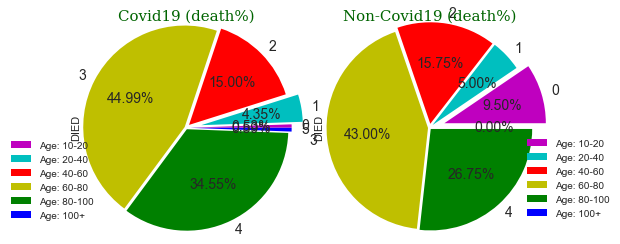

In [77]:
plt.subplot(1,2,1)
pie_vars_df.reset_index(drop=True, inplace=True)
explode = (0.05,0.19,0.05,0.02,0.02,0.05)
colors=['m', 'c', 'r','y','g','b']

# Pie plotting, labelling and formatting 
pie_vars_df.plot(kind='pie', subplots=True, figsize=(5,5), autopct='%0.2f%%', colors=colors,
               radius=1.25, explode=explode, fontsize=14)

plt.legend(loc="lower right", bbox_to_anchor=(0.09,0.000), 
           labels=['Age: 10-20', 'Age: 20-40', 'Age: 40-60', 'Age: 60-80', 'Age: 80-100', 'Age: 100+'])
plt.title("Covid19 (death%)",fontdict=font1)

plt.subplot(1,2,2)
pie_died_df.reset_index(drop=True, inplace=True)
explode = (0.19,0.05,0.05,0.02,0.02,0.05)
colors=['m', 'c', 'r','y','g','b']

# Pie plotting, labelling and formatting 
pie_died_df.plot(kind='pie', subplots=True, figsize=(5,5), autopct='%0.2f%%', colors=colors,
               radius=1.25, explode=explode, fontsize=14)

plt.legend(loc="lower right", bbox_to_anchor=(1.43,0.01), 
           labels=['Age: 10-20', 'Age: 20-40', 'Age: 40-60', 'Age: 60-80', 'Age: 80-100', 'Age: 100+'])
plt.title("Non-Covid19 (death%)",fontdict=font1)

In [78]:
# Extracting number of death after Covid19 vaccination in two weeks grouped by Age Ranges and Numdays
pie_vars_died_df=vars_clean_df.sort_values(by='AGE_YRS').groupby(['Age Ranges','NUMDAYS'])['DIED'].count()

# Resetting index to get the dataframe
age_vars=pie_vars_died_df.reset_index()

# Extracting number of death after non-Covid19 vaccination in two weeks grouped by Age Ranges and Numdays
non_covid=pie_noncovid_df.sort_values(by='AGE_YRS').groupby(['Age Ranges','NUMDAYS'])['DIED'].count()

# Resetting index to get the dataframe
other_vaccines=non_covid.reset_index()

Text(0, 0.5, 'Number of deaths')

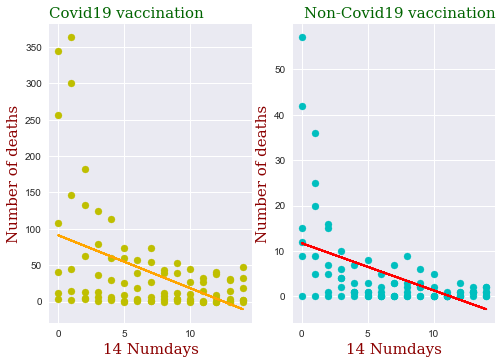

In [83]:
# Extracting the field NUMDAYS
plt.subplot(1,2,1)

covid_numdays=age_vars.iloc[:,1]

# Extracting the field DIED
covid_died=age_vars.iloc[:,2]

c19_slope, c19_int, c19_r, c19_p, c19_std_err = stats.linregress(covid_numdays, covid_died)
c19_fit = c19_slope * covid_numdays + c19_int
plt.plot(covid_numdays,c19_fit,"--", color='orange')

# Scatter plotting
plt.scatter(covid_numdays, covid_died, color='y')
plt.title('Covid19 vaccination',loc='left', fontdict=font1)
plt.xlabel('14 Numdays', fontdict=font2 )
plt.ylabel('Number of deaths', fontdict=font2)

plt.subplot(1,2,2)
# Extracting the field NUMDAYS
nonCovid_numdays=other_vaccines.iloc[:,1]

# Extracting the field DIED
nonCovid_died=other_vaccines.iloc[:,2]

#plotting regression line
nc_slope, nc_int, nc_r, nc_p, nc_std_err = stats.linregress(nonCovid_numdays, nonCovid_died)
nc_fit = nc_slope * nonCovid_numdays + nc_int
plt.plot(nonCovid_numdays,nc_fit,"--", color='r')

# Scatter plotting
plt.scatter(nonCovid_numdays, nonCovid_died, color='c')
plt.title('Non-Covid19 vaccination', loc='right', fontdict=font1)
plt.xlabel('14 Numdays', fontdict=font2 )
plt.ylabel('Number of deaths', fontdict=font2)